# C3M3 Lesson 1 Practice Lab: Flight delays and cancellations - Matplotlib Charts

You are working at a travel agency in Australia. You are tasked with analyzing the delays and cancellations in flights. To better serve customers, the travel agency needs insights into the variability and distribution of flight delays. Are delays typically minor, or do extreme outliers cause issues? You will be using advanced visualization tools like histograms, heatmaps, and boxplots, to analyze these factors.

In this module's practice labs you will be working with the Domestic Airlines - On Time Performance dataset from the Australian Government data. You will use the following columns:

- `Route`: Plane route Departure City - Arrival City
- `Airline`: name of the operating airline. If the value is “All Airlines”, the data given represents aggregated values.
- `Month`: month of the flight
- `Sectors_Flown`: how many flights were actually done for the given airline and route for the given month
- `Cancellations`: number of cancellations
- `Arrivals_Delayed`: Number of flights that arrived at the gate 15 minutes after the scheduled arrival time shown in the carriers' schedule.


## Table of contents
- [Step 1: Import libraries](#import-libraries)
- [Step 2: Load the data](#load-the-data)
- [Step 3: Cancellations by airline](#cancellations-by-airline)
- [Step 4: Correlations](#correlations)

<a id="import-libraries"></a>

## Step 1: Import libraries
This time you will need to import matplotlib in addition to pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<a id="load-the-data"></a>

## Step 2: Load the data
Run the cell below to load the data.
</div>

In [2]:
df = pd.read_csv("data/otp_time_series_web.csv")
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed
0,Adelaide-Brisbane,Adelaide,Brisbane,Qantas,2004-01-01,93.0,93,0.0,81.0,85.0,12.0,8.0
1,Adelaide-Canberra,Adelaide,Canberra,Qantas,2004-01-01,48.0,48,0.0,45.0,45.0,3.0,3.0
2,Adelaide-Gold Coast,Adelaide,Gold Coast,Qantas,2004-01-01,9.0,9,0.0,8.0,8.0,1.0,1.0
3,Adelaide-Melbourne,Adelaide,Melbourne,Qantas,2004-01-01,352.0,350,2.0,317.0,325.0,33.0,25.0
4,Adelaide-Perth,Adelaide,Perth,Qantas,2004-01-01,130.0,130,0.0,121.0,125.0,9.0,5.0


<a id="cancellations-by-airline"></a>

## Step 3: Cancellations by airline
The routes with the largest number of scheduled flights are, by far, the ones connecting Melbourne and Sydney, the two largest cities in Australia.
You want to visualize the cancellation rate per airline for the Melbourne-Sydney Route during the last reported month (2024-09-01) 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the next cell to retrieve the rows corresponding to the last reported month (<code>2024-09-01</code>) for the <code>Melbourne-Sydney</code> Route.</li>
            <li>Group the data by <code>Airline</code> and sum the values in the <code>Cancellations</code> column to aggregate cancellations for each airline.</li>
            <li>Create a column chart to visualize the number of cancellations of each airline for the selected data.</li>
        </ol>
</div>


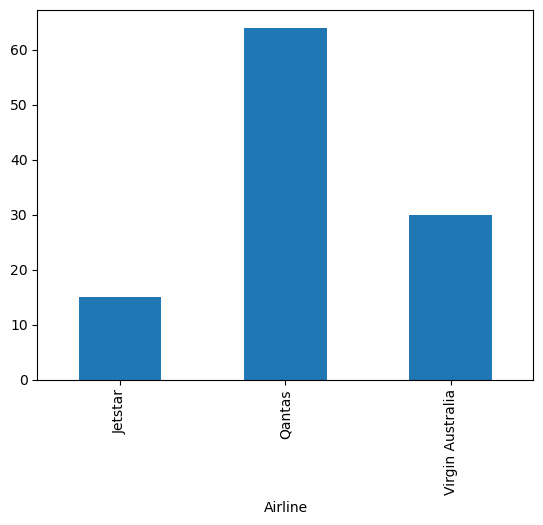

In [3]:
### START CODE HERE ###

# Filter for the Melbourne-Sydney route in September 2024
mel_syd_end_month = df[(df["Route"] == "Melbourne-Sydney") & (df["Month"] == "2024-09-01")]

# Group by Airline and sum the Cancellations column
grouped_cancellations = mel_syd_end_month.groupby("Airline")["Cancellations"].sum()

# Plot the column chart
grouped_cancellations.plot(kind="bar")
plt.show()

### END CODE HERE ###

This column chart is ok-ish, but it could be better. Use the next cell to improve the column chart so it looks better.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to repeat the column chart, but this time apply the following enhancements:</li>
            <ul>
                <li>Give the chart an appropriate title</li>
                <li>Rotate the x-axis tick labels to 0 degrees (horizontal)</li>
                <li>Set a good y-axis label, showing what the values represent</li>
            </ul>
        </ol>
</div>

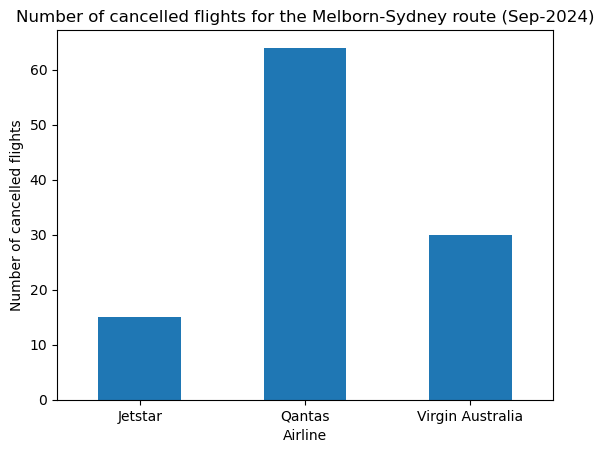

In [4]:
### START CODE HERE ###

# repeat the column chart
grouped_cancellations.plot(kind="bar")
# add the title
plt.title("Number of cancelled flights for the Melborn-Sydney route (Sep-2024)")
# rotate the xticks
plt.xticks(rotation=0)
# set the ylabel
plt.ylabel("Number of cancelled flights")

plt.show()

### END CODE HERE ###

A good way to better understand how many flights were cancelled is to plot the cancellations together with the non-cancelled flights (Sectors_Flown). This kind of information is particularly well suited for a stacked bar chart, as the sum of these two adds together to the total number of scheduled flights.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Save the two columns of interest: <code>Sectors_Flown</code>, <code>Cancellations</code> to the columns variable.</li>
            <li>Group by <code>Airline</code> and select the columns of interest to sum.</li>
            <li>Plot a stacked column chart (<code>kind="bar"</code>, <code>stacked=True</code>) showing the sum of cancellations and delays per quarter.</li>
            <li>Give the chart an appropriate title.</li>
            <li>Rotate the x-axis tick labels to 0 degrees (horizontal).</li>
            <li>Set a good y-axis label, showing what the values represent.</li>
        </ol>
</div> 

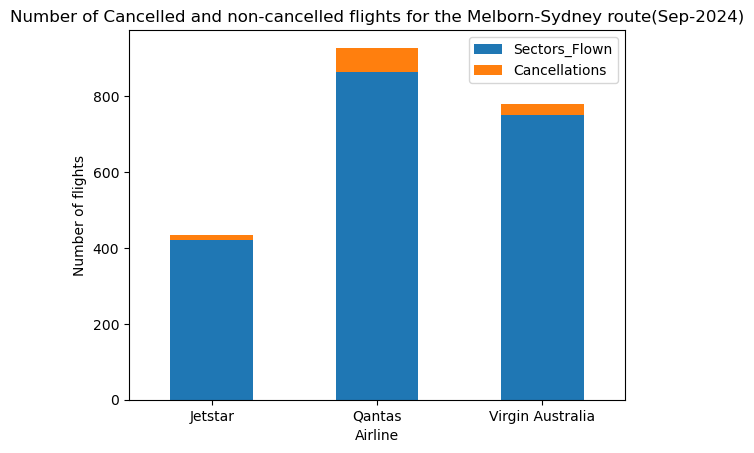

In [5]:
### START CODE HERE ###

# define the columns of interest
columns = ["Sectors_Flown", "Cancellations"]

# group by Airline and sum the columns of interest
grouped_flown_and_cancellations = mel_syd_end_month.groupby("Airline")[columns].sum()

# plot a stacked bar chart
grouped_flown_and_cancellations.plot(
    kind="bar", 
    stacked=True
)

# add the title
plt.title("Number of Cancelled and non-cancelled flights for the Melborn-Sydney route(Sep-2024)")
# rotate the xticks
plt.xticks(rotation=0)
# set the ylabel
plt.ylabel("Number of flights")

plt.show()

### END CODE HERE ###

Based on this plot, which airline would you rather book? 

<a id="correlations"></a>

## Step 4: Correlations

As the travel agency aims to improve flight scheduling, it’s important to understand how delays and cancellations are connected. You decide to create a scatter plot of the number of delayed flights vs. number of cancellations and see if you can reveal any patterns, helping you identify correlations that can inform safer booking recommendations.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the following cell to create a scatter plot of the "Cancellations" and "Arrivals_Delayed" columns</li>
            <ul>
                <li>Change the markers to have diamond shapes ('D'), and color "forestgreen". You can do this configuring the arguments  <code>marker></code> and <code>color</code> respectively</li>
            </ul>
            <li>Use Matplotlib to enhance the plot:</li>
            <ul>
                <li>Add an appropriate title. Set the font size to 15</li> 
                <li>Change the "Arrivals_Delayed" axis label to "Delayed Arrivals"
            </ul>
            <li>Print the correlation between the features and compare with the scatter plot</li>
        </ol>
</div>

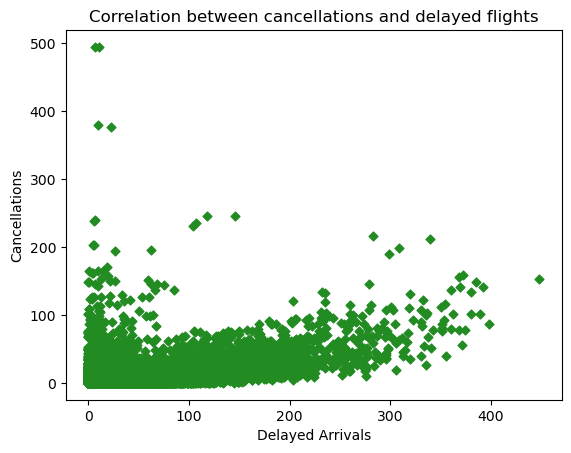

Correlation: 0.530327741261574


In [6]:
### START CODE HERE ###

# create the scatter plot. Set the marker configuration
df.plot(kind="scatter", x="Arrivals_Delayed", y="Cancellations", color="forestgreen", marker='D')
# set the title
plt.title("Correlation between cancellations and delayed flights")
# change the Arrivals_Delayed label
plt.xlabel("Delayed Arrivals")

plt.show()

### END CODE HERE ###

# print the correlation
print("Correlation:", df["Cancellations"].corr(df["Arrivals_Delayed"]))